# Task 3 :- To Explore Unsupervised Machine Learning

#### PROBLEM STATEMENT :-
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually. Data can be found at 
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

To get started with data analysis and preprocessing we need to to import some python libraries.

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [18]:
# Set the working directory
os.chdir('/home/abhishek/Downloads/')

In [19]:
# Load the iris dataset
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.shape

(150, 6)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [22]:
''''I drop 'id' column as it is useless and since 'Species' is a dependent variable which is 
not required in unsupervised learning so i also drop it.'''

df.drop(['Id','Species'],inplace=True,axis=1)

In [23]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###  Missing value analysis

In [25]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_per = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_per['Missing_percentage'] = (missing_per['Missing_percentage']/len(df))*100
#descending order
missing_per = missing_per.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_per

,Variables,Missing_percentage
0,SepalLengthCm,0.0
1,SepalWidthCm,0.0
2,PetalLengthCm,0.0
3,PetalWidthCm,0.0


No missing values are present.

### Visualisation of data

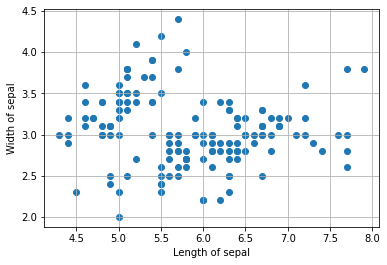

In [26]:
# Scatter plot with sepallength and sepalwidth
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.grid()
plt.show()

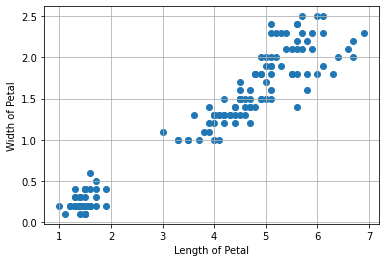

In [27]:
# Scatter plot with petallength and petalwidth
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel('Length of Petal')
plt.ylabel('Width of Petal')
plt.grid()
plt.show()

#### To find the Optimum Number of cluster ,  we use a method called "Elbow Method"

In [28]:
# We need to create an array from dataframe
x = df.iloc[:, [0, 1, 2, 3]].values

In [29]:
from sklearn.cluster import KMeans

k_values = [2,3,4,5,6,7,8,9,10]
WCSS = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 0).fit(x)
    WCSS.append(kmeans.inertia_)
WCSS

[152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.19068792479662,
 30.063874432733137,
 27.84235606060606,
 26.04820224804436]

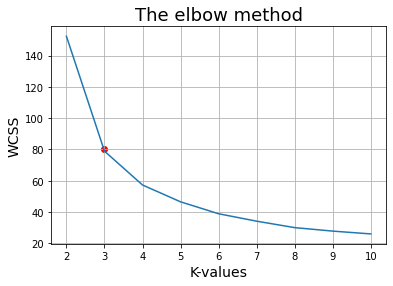

In [30]:
''''Plotting the results onto a line graph so that we can observe 'The elbow'''
plt.plot(k_values, WCSS)
plt.xlabel('K-values',size=14)
plt.ylabel('WCSS',size=14)
plt.title('The elbow method',size=18)
plt.scatter(3 , 80 , color = "red")
plt.grid()
plt.show()

The point where the most distortion takes place , is the optimal value of Cluster.

From this we choose the number of clusters as **3**.

In [31]:
optimal_k = 3

# Implementing K-Means++ using optimal value of K
kmeans = KMeans(n_clusters = optimal_k , init='k-means++', max_iter = 300, random_state = 0)
kmeans.fit(x)
pred = kmeans.predict(x)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


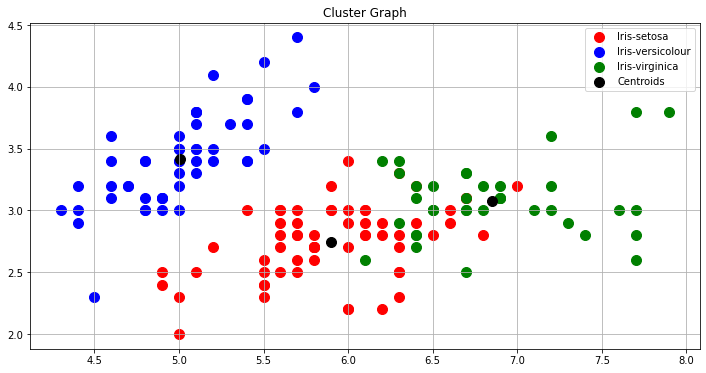

In [32]:
#Visualising the Clusters 
plt.figure(figsize=(12,6))
plt.title('Cluster Graph')


plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.grid()
plt.legend()
plt.show()

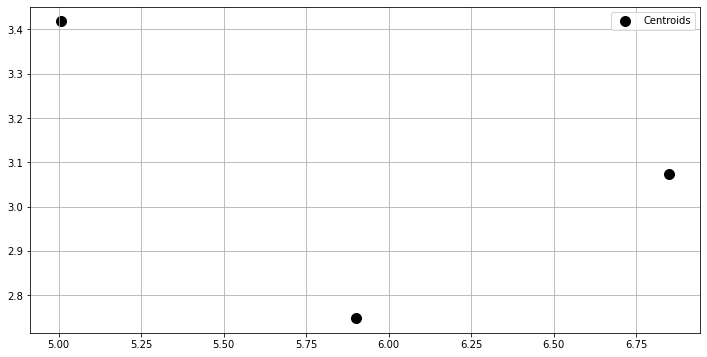

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.grid()
plt.legend()
plt.show()